# Escola de idiomas - Técnicas de Machine Learning (Binarizado)

### Métodos:

* Regressão Linear
* Regressão Logistica
* SVM
* KNN
* RandomForest
* DecisionTree
* Redes Neurais
* PCA

#### Importando as bibliotecas:
* pandas, numpy, matplotlib e seaborn
* sklearn.preprocessing (StandardScaler) e sklearn.model_selection (train_test_split)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
#importando o arquivo de dados
dados_escola = 'Arquivos\Convertidos.xlsx'
df = pd.read_excel(dados_escola)

In [21]:
#Avaliando e verificando os dados
df.head()

,Caso,Idade,Renda,Sexo,Estado Civil,Filhos,Escolaridade,Escolaridade mãe,Escolaridade pai,Idioma,...,Relevância para a carreira,Relevância vida pessoal,Dificuldade de aprendizado,Nivelamento,Dificuldade de conciliar a carga horaria,Funcionalidades do curso/Horarios da aula,Metodologia/Integração,Disciplina/Relacionamento com o professor,Satisfação com o IE,Desistencia
0,1,24,1,1,1,1,3,5,5,1,...,6,4,3,2,4,3,3,1,3,0
1,1,21,3,1,1,1,3,7,5,1,...,6,6,4,4,5,3,3,1,4,0
2,1,47,3,2,2,3,6,3,3,1,...,5,5,3,3,4,4,4,1,4,0
3,1,24,2,2,1,1,3,7,2,1,...,6,6,3,3,4,4,3,2,3,0
4,1,20,1,1,1,1,3,5,4,1,...,6,6,3,3,4,5,5,2,5,0


In [22]:
df.describe()

,Caso,Idade,Renda,Sexo,Estado Civil,Filhos,Escolaridade,Escolaridade mãe,Escolaridade pai,Idioma,...,Relevância para a carreira,Relevância vida pessoal,Dificuldade de aprendizado,Nivelamento,Dificuldade de conciliar a carga horaria,Funcionalidades do curso/Horarios da aula,Metodologia/Integração,Disciplina/Relacionamento com o professor,Satisfação com o IE,Desistencia
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,...,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,2.126214,23.566343,2.990291,1.495146,1.077670,1.035599,3.213592,5.877023,5.634304,1.391586,...,5.365696,4.961165,2.851133,2.877023,3.071197,3.533981,3.841424,2.417476,3.776699,0.475728
std,0.729877,4.245659,1.356766,0.507229,0.323013,0.232214,0.755720,1.559769,1.778001,1.028203,...,0.914665,1.040626,0.934810,0.812497,1.123009,0.930879,0.851335,1.420108,0.921589,0.500221
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,21.000000,2.000000,1.000000,1.000000,1.000000,3.000000,5.000000,5.000000,1.000000,...,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,3.000000,1.000000,3.000000,0.000000
50%,2.000000,23.000000,3.000000,1.000000,1.000000,1.000000,3.000000,7.000000,6.000000,1.000000,...,6.000000,5.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,0.000000
75%,3.000000,25.000000,4.000000,2.000000,1.000000,1.000000,3.000000,7.000000,7.000000,1.000000,...,6.000000,6.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,3.000000,51.000000,6.000000,3.000000,4.000000,3.000000,6.000000,8.000000,9.000000,7.000000,...,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.000000,1.000000


In [3]:
# identificação da menor taxa de erro
def buscarMenor(lst):
    i = float("inf")
    for nr in lst:
        if nr < i:
            i = nr
            c = lst.index(nr)
    return c + 1

## Colunas com maior impacto - PCA

In [4]:
#import da libraria
from sklearn.decomposition import PCA
from sklearn import preprocessing 
#definição dos dados
scaled_data = preprocessing.scale(df.drop('Desistencia', axis = 1).T)
#realizando os procedimentos de treinamento PCA
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

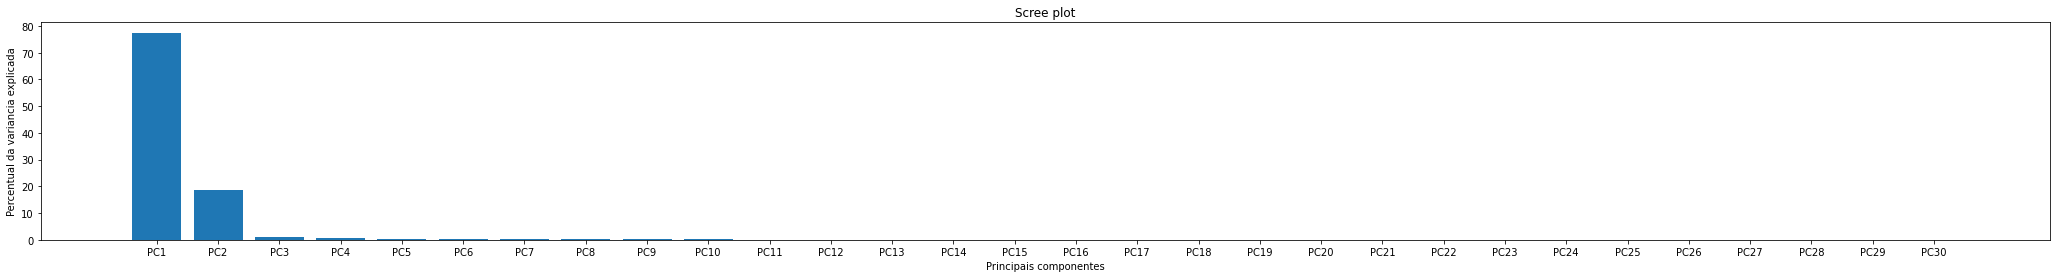

In [5]:
import random as rd
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

#Scree plot
plt.figure(figsize=[36, 4])
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentual da variancia explicada')
plt.xlabel('Principais componentes')
plt.title('Scree plot')
plt.show()

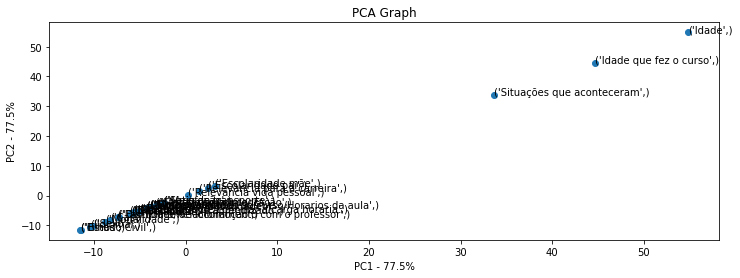

In [6]:
pca_df = pd.DataFrame(pca_data, index=[df.drop('Desistencia', axis = 1)], columns=labels)

plt.figure(figsize=[12, 4])
plt.scatter(pca_df.PC1, pca_df.PC1)
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[0]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC1.loc[sample]))

In [7]:
loading_scores = pd.Series(pca_df['PC1'])
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

#definição das 15 colunas importantes 
top_15 = sorted_loading_scores[0:15].index.values

print(loading_scores[top_15])
type(loading_scores[top_15])

Idade                                        54.853378
Idade que fez o curso                        44.629362
Situações que aconteceram                    33.635339
Filhos                                      -11.535973
Estado Civil                                -11.434542
Idioma                                      -10.428643
Sexo                                        -10.105323
Modalidade                                   -8.741731
Caso                                         -8.256158
Disciplina/Relacionamento com o professor    -7.330852
Facilidade de locomoção                      -7.277616
Dificuldade de aprendizado                   -6.044816
Distância                                    -5.955345
Nivelamento                                  -5.943353
Dificuldade de conciliar a carga horaria     -5.612841
Name: PC1, dtype: float64


pandas.core.series.Series

### Padronizando para os conjunto de treino e teste

In [8]:
X = df.drop('Desistencia', axis = 1)
y = df['Desistencia']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_pad = scaler.fit_transform(X_train)
X_test_pad = scaler.fit_transform(X_test)

### Execução do PCA

In [10]:
pca = PCA(n_components=len(X.columns))
pca.fit(X_train_pad)
X_train_pca = pca.transform(X_train_pad)
np.shape(X_train_pca)

(216, 30)

In [11]:
X_test_pca = pca.transform(X_test_pad)
var_explicada = pca.explained_variance_ratio_
var_explicada.sum()

1.0

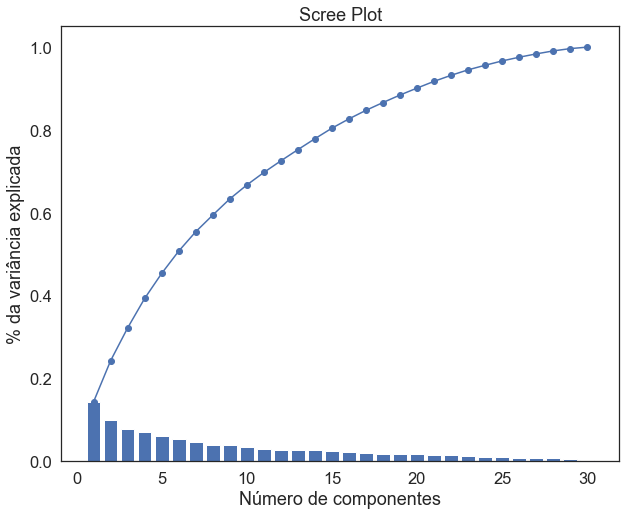

In [12]:
#Scree plot
componentes = list(i for i in range(1,31))
plt.figure(figsize=[10, 8])
sns.set(font_scale=1.5, style='white')
plt.title('Scree Plot')
plt.xlabel('Número de componentes')
plt.ylabel('% da variância explicada')
plt.bar(componentes, var_explicada)
plt.plot(componentes, np.cumsum(var_explicada), marker='o')

### Finalizando o PCA

In [33]:
pca = PCA(n_components=10)
pca.fit(X_train_pad)
X_train_pca = pca.transform(X_train_pad)
X_test_pca = pca.transform(X_test_pad)
np.shape(X_train_pca)

(216, 10)

In [34]:
variaveis_treino = [X_train, X_train_pad, X_train_pca]
variaveis_teste = [X_test, X_test_pad, X_test_pca]
classi_analise = []
confu_analise = []

In [35]:
len(variaveis_treino)

3

## Regressão Linear

In [36]:
#importando a livraria
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [37]:
#A partir da padronização
#Definição de laço inicial 
i = 0
# Laço de 10 repetições para retirar média dos testes
for i in range (0,10):
    # Laço de repetição para treinamento e predição em Normal, PAD e PCA
    for vari in range(0, len(variaveis_treino)):
        logmodel = LogisticRegression()
        logmodel.fit(variaveis_treino[vari], y_train)
        #predição
        predictions = logmodel.predict(variaveis_teste[vari])
        #matriz de confusão e classificação
        from sklearn.metrics import classification_report, confusion_matrix
        #imprimindo classificação
        classi_analise.append(classification_report(y_test,predictions))
        confu_analise.append(confusion_matrix(y_test,predictions))
    i =+ 1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [38]:
# Reformulando os dados e remodelando
classi_analise = pd.DataFrame(data=np.reshape(classi_analise, (10, 3)), index=None)
confu_analise = pd.DataFrame(data=np.reshape(confu_analise, (30, 4)), index=None)

In [39]:
# Exportando dados para análise
classi_analise.to_excel('RelTeste\classification_report_RLin.xlsx', index=False)
confu_analise.to_excel('RelTeste\confusion_matrix_RLin.xlsx', index=False)

In [40]:
# reset dos valores
classi_analise = []
confu_analise = []

## Regressão Logistica

In [41]:
#Importando o método de RL
from sklearn.linear_model import LogisticRegression

In [42]:
#A partir da padronização
#Definição de laço inicial 
i = 0
# Laço de 10 repetições para retirar média dos testes
for i in range (0,10):
    # Laço de repetição para treinamento e predição em Normal, PAD e PCA
    for vari in range(0, len(variaveis_treino)):
        reglog = LogisticRegression()
        reglog.fit(variaveis_treino[vari], y_train)
        #predição
        predictions = reglog.predict(variaveis_teste[vari])
        #imprimindo classificação
        classi_analise.append(classification_report(y_test,predictions))
        confu_analise.append(confusion_matrix(y_test,predictions))
    i =+ 1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [43]:
# Reformulando os dados e remodelando
classi_analise = pd.DataFrame(data=np.reshape(classi_analise, (10, 3)), index=None)
confu_analise = pd.DataFrame(data=np.reshape(confu_analise, (30, 4)), index=None)

In [44]:
# Exportando dados para análise
classi_analise.to_excel('Relatorio\classification_report_RLog.xlsx', index=False)
confu_analise.to_excel('Relatorio\confusion_matrix_RLog.xlsx', index=False)

In [45]:
# reset dos valores
classi_analise = []
confu_analise = []

## KNN

In [46]:
#Importando o método KNN
from sklearn.neighbors import KNeighborsClassifier

Text(0.5, 1.0, 'Scree plot')

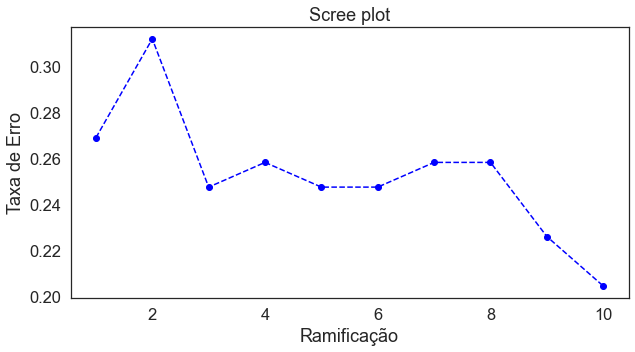

In [47]:
#criação de conjunto vazio 
error_rate = []

#criação de laço for, para definir melhor número de vizinhos
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_pad, y_train)
    pred = knn.predict(X_test_pad)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(10,5))
plt.plot(range(1,11), error_rate, color='blue', linestyle='dashed', marker='o')
plt.xlabel('Ramificação')
plt.ylabel('Taxa de Erro')
plt.title('Scree plot')

In [48]:
#validação do menor índice
menor = buscarMenor(error_rate)

#Após identificação da melhor ramificação ou profundidade
#Definição de laço inicial 
i = 0
# Laço de 10 repetições para retirar média dos testes
for i in range (0,10):
    # Laço de repetição para treinamento e predição em Normal, PAD e PCA
    for vari in range(0, len(variaveis_treino)):
        knn = KNeighborsClassifier(n_neighbors=menor)
        knn.fit(variaveis_treino[vari], y_train)
        #predição
        predictions = knn.predict(variaveis_teste[vari])
        #imprimindo classificação
        classi_analise.append(classification_report(y_test,predictions))
        confu_analise.append(confusion_matrix(y_test,predictions))
    i =+ 1

In [49]:
# Reformulando os dados e remodelando
classi_analise = pd.DataFrame(data=np.reshape(classi_analise, (10, 3)), index=None)
confu_analise = pd.DataFrame(data=np.reshape(confu_analise, (30, 4)), index=None)

In [50]:
# Exportando dados para análise
classi_analise.to_excel('Relatorio\classification_report_KNN.xlsx', index=False)
confu_analise.to_excel('Relatorio\confusion_matrix_KNN.xlsx', index=False)

In [51]:
# reset dos valores
classi_analise = []
confu_analise = []

## SVM

In [52]:
#importando biblioteca
from sklearn.svm import SVC

In [53]:
#Após identificação da melhor ramificação ou profundidade
#Definição de laço inicial 
i = 0
# Laço de 10 repetições para retirar média dos testes
for i in range (0,10):
    # Laço de repetição para treinamento e predição em Normal, PAD e PCA
    for vari in range(0, len(variaveis_treino)):
        model = SVC()
        model.fit(variaveis_treino[vari], y_train)
        #predição
        predictions = model.predict(variaveis_teste[vari])
        #imprimindo classificação
        classi_analise.append(classification_report(y_test,predictions))
        confu_analise.append(confusion_matrix(y_test,predictions))
    i =+ 1

In [54]:
# Reformulando os dados e remodelando
classi_analise = pd.DataFrame(data=np.reshape(classi_analise, (10, 3)), index=None)
confu_analise = pd.DataFrame(data=np.reshape(confu_analise, (30, 4)), index=None)

In [55]:
# Exportando dados para análise
classi_analise.to_excel('Relatorio\classification_report_SVM.xlsx', index=False)
confu_analise.to_excel('Relatorio\confusion_matrix_SVM.xlsx', index=False)

In [56]:
# reset dos valores
classi_analise = []
confu_analise = []

In [57]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [60]:
grid.fit(X_train_pad,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 1/5] END ...............C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 2/5] END ...............C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 3/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [61]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [62]:
grid.best_estimator_

SVC(C=100, gamma=0.01)

In [63]:
grid_predictions = grid.predict(X_test_pad)

In [64]:
print(confusion_matrix(y_test,grid_predictions))

[[39  4]
 [ 8 42]]


In [65]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        43
           1       0.91      0.84      0.87        50

    accuracy                           0.87        93
   macro avg       0.87      0.87      0.87        93
weighted avg       0.87      0.87      0.87        93



## Arvore de Decisão

In [66]:
#importando biblioteca
from sklearn.tree import DecisionTreeClassifier

Text(0.5, 1.0, 'Scree plot')

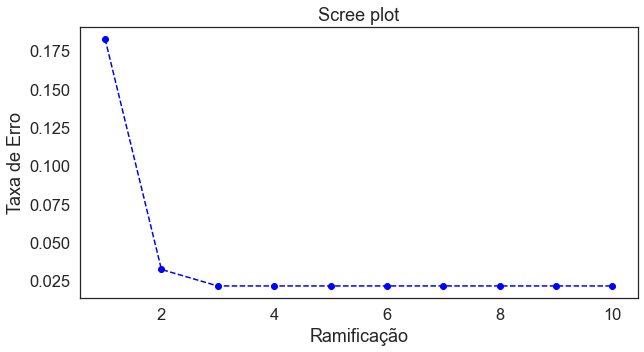

In [67]:
#criação de conjunto vazio 
error_rate = []

#criação de laço for, para definir melhor ponto de profundidade das folhas
for i in range(1,11):
    dectree = DecisionTreeClassifier(max_depth=i)
    dectree.fit(X_train_pad, y_train)
    pred = dectree.predict(X_test_pad)
    error_rate.append(np.mean(pred != y_test))
    
plt.figure(figsize=(10,5))
plt.plot(range(1,11), error_rate, color='blue', linestyle='dashed', marker='o')
plt.xlabel('Ramificação')
plt.ylabel('Taxa de Erro')
plt.title('Scree plot')

In [68]:
#validação do menor índice
menor = buscarMenor(error_rate)

#Após identificação da melhor ramificação ou profundidade
#Definição de laço inicial 
i = 0
# Laço de 10 repetições para retirar média dos testes
for i in range (0,10):
    # Laço de repetição para treinamento e predição em Normal, PAD e PCA
    for vari in range(0, len(variaveis_treino)):
        dectree = DecisionTreeClassifier(max_depth=menor)
        dectree.fit(variaveis_treino[vari], y_train)
        #predição
        predictions = dectree.predict(variaveis_teste[vari])
        #imprimindo classificação
        classi_analise.append(classification_report(y_test,predictions))
        confu_analise.append(confusion_matrix(y_test,predictions))
    i =+ 1

In [69]:
# Reformulando os dados e remodelando
classi_analise = pd.DataFrame(data=np.reshape(classi_analise, (10, 3)), index=None)
confu_analise = pd.DataFrame(data=np.reshape(confu_analise, (30, 4)), index=None)

In [70]:
# Exportando dados para análise
classi_analise.to_excel('Relatorio\classification_report_TD.xlsx', index=False)
confu_analise.to_excel('Relatorio\confusion_matrix_TD.xlsx', index=False)

In [71]:
# reset dos valores
classi_analise = []
confu_analise = []

## Randon Forest

* a execução das etapas em RF será semelhante ao de Arvore de decisão.

In [72]:
#importando biblioteca
from sklearn.ensemble import RandomForestClassifier

Text(0.5, 1.0, 'Scree plot')

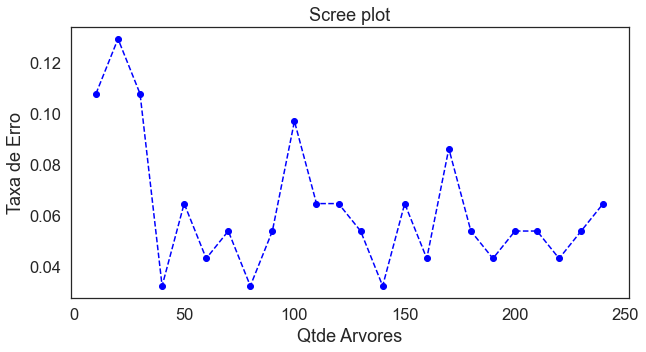

In [73]:
#criação de conjunto vazio 
error_rate = []

#criação de laço for, para definir melhor ponto
for i in range(10,250,10):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train_pad, y_train)
    pred_forest = rfc.predict(X_test_pad)
    error_rate.append(np.mean(pred_forest != y_test))
    
plt.figure(figsize=(10,5))
plt.plot(range(10,250,10), error_rate, color='blue', linestyle='dashed', marker='o')
plt.xlabel('Qtde Arvores')
plt.ylabel('Taxa de Erro')
plt.title('Scree plot')

In [74]:
#validação do menor índice
menor = buscarMenor(error_rate)

#Após identificação da melhor ramificação ou profundidade
#Definição de laço inicial 
i = 0
# Laço de 10 repetições para retirar média dos testes
for i in range (0,10):
    # Laço de repetição para treinamento e predição em Normal, PAD e PCA
    for vari in range(0, len(variaveis_treino)):
        rfc = RandomForestClassifier(n_estimators=menor)
        rfc.fit(variaveis_treino[vari], y_train)
        #predição
        predictions = rfc.predict(variaveis_teste[vari])
        #imprimindo classificação
        classi_analise.append(classification_report(y_test,predictions))
        confu_analise.append(confusion_matrix(y_test,predictions))
    i =+ 1

In [75]:
# Reformulando os dados e remodelando
classi_analise = pd.DataFrame(data=np.reshape(classi_analise, (10, 3)), index=None)
confu_analise = pd.DataFrame(data=np.reshape(confu_analise, (30, 4)), index=None)

In [76]:
# Exportando dados para análise
classi_analise.to_excel('Relatorio\classification_report_RF.xlsx', index=False)
confu_analise.to_excel('Relatorio\confusion_matrix_RF.xlsx', index=False)

In [77]:
# reset dos valores
classi_analise = []
confu_analise = []

## Artificial Neural Network

In [78]:
#importando biblioteca
from sklearn.neural_network import MLPClassifier

Text(0.5, 1.0, 'Scree plot')

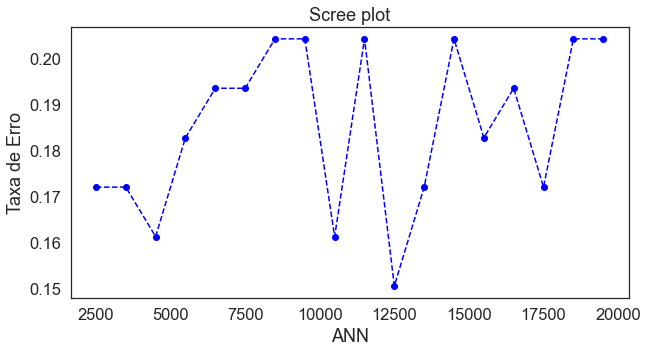

In [79]:
#criação de conjunto vazio 
error_rate = []

#criação de laço for, para definir melhor ponto
for i in range(2500,20000,1000):
    ann = MLPClassifier(max_iter = i)
    ann.fit(X_train_pad, y_train)
    pred_ann = ann.predict(X_test_pad)
    error_rate.append(np.mean(pred_ann != y_test))
    
plt.figure(figsize=(10,5))
plt.plot(range(2500,20000,1000), error_rate, color='blue', linestyle='dashed', marker='o')
plt.xlabel('ANN')
plt.ylabel('Taxa de Erro')
plt.title('Scree plot')

In [80]:
#validação do menor índice
menor = buscarMenor(error_rate)

#Após identificação da melhor ramificação ou profundidade
#Definição de laço inicial 
i = 0
# Laço de 10 repetições para retirar média dos testes
for i in range (0,10):
    # Laço de repetição para treinamento e predição em Normal, PAD e PCA
    for vari in range(0, len(variaveis_treino)):
        ann = MLPClassifier(max_iter=menor)
        ann.fit(variaveis_treino[vari], y_train)
        #predição
        predictions = ann.predict(variaveis_teste[vari])
        #imprimindo classificação
        classi_analise.append(classification_report(y_test,predictions))
        confu_analise.append(confusion_matrix(y_test,predictions))
    i =+ 1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (11) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (11) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (11) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (11) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilaye

In [81]:
# Reformulando os dados e remodelando
classi_analise = pd.DataFrame(data=np.reshape(classi_analise, (10, 3)), index=None)
confu_analise = pd.DataFrame(data=np.reshape(confu_analise, (30, 4)), index=None)

In [82]:
# Exportando dados para análise
classi_analise.to_excel('Relatorio\classification_report_ANN.xlsx', index=False)
confu_analise.to_excel('Relatorio\confusion_matrix_ANN.xlsx', index=False)

In [83]:
# reset dos valores
classi_analise = []
confu_analise = []